In [100]:
import statsmodels.api as sm
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Base de Datos

In [101]:
#Leemos el archivo csv 'Base de datos.csv'
datos = pd.read_csv('/content/Base_de_datos.csv')
datos

,Incumplimiento,Hijos,Trabajos,Edad,AniosEdu,Salario,Deuda
0,1,4,13,31,8,17530.630530,67368.599450
1,1,5,7,35,10,12658.954140,80191.473770
2,0,1,3,24,14,21049.185210,2977.467913
3,0,0,5,29,12,25169.650360,5454.690731
4,0,2,5,32,11,29468.720090,3106.255318
...,...,...,...,...,...,...,...
995,0,5,14,31,10,20586.602850,6735.209334
996,1,2,9,29,9,26602.312510,33471.459850
997,0,3,9,29,13,16658.836810,14155.236200
998,0,1,12,26,9,6350.572151,7224.645150


In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos las variables del modelo

In [103]:
#Variables independientes
lista = ['Hijos','Trabajos','AniosEdu','Salario', 'Deuda'] #Variables Independientes
X = datos[lista]

# Variable Dependiente
Y = datos['Incumplimiento']

In [104]:
# Añadir una constante al modelo
X = sm.add_constant(X)

# Modelo de Regresión Lineal Múltiple (RLM)

In [105]:
# Ajustar el modelo de regresión lineal múltiple
RLM_model = sm.OLS(Y, X).fit()

# Imprimir los resultados
print(RLM_model.summary())

                            OLS Regression Results                            
Dep. Variable:         Incumplimiento   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     238.2
Date:                Thu, 14 Mar 2024   Prob (F-statistic):          3.47e-167
Time:                        05:39:38   Log-Likelihood:                -186.84
No. Observations:                1000   AIC:                             385.7
Df Residuals:                     994   BIC:                             415.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3025      0.078     -3.886      0.0

Se obtienen las betas del modelo



In [106]:
#Imprimimos nuestros parámetros
RLM_beta = RLM_model.params
RLM_beta

const      -0.302506
Hijos       0.034354
Trabajos    0.015449
AniosEdu   -0.011596
Salario     0.000010
Deuda       0.000012
dtype: float64

Encontramos las probabilidades estimadas de incumplimiento (Y estimada)

In [107]:
#Estimamos nuestras probabilidades y anexamos datos reales en dataframe
RLM_P = pd.DataFrame()
RLM_P['Probabilidad Estimada'] = (X*RLM_beta).sum(axis=1)
RLM_P['Y'] = datos['Incumplimiento']
RLM_P

,Probabilidad Estimada,Y
0,0.920706,1
1,0.939294,1
2,-0.128581,0
3,-0.036486,0
4,0.061166,0
...,...,...
995,0.264614,0
996,0.474061,1
997,0.130193,0
998,-0.035447,0


# Modelo LOGIT

In [108]:
# Ajustar el modelo de regresión logit
logit_model = sm.Logit(Y, X).fit()

# Imprimir los resultados del modelo logit
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.251100
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Incumplimiento   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.5526
Time:                        05:39:38   Log-Likelihood:                -251.10
converged:                       True   LL-Null:                       -561.23
Covariance Type:            nonrobust   LLR p-value:                8.439e-132
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1090      1.052     -7.711      0.000     -10.170      -6.048
Hijos          0.4007      0.

Se obtienen las betas del modelo

In [109]:
#Imprimimos nuestros parámetros
logit_beta = logit_model.params
logit_beta

const      -8.108982
Hijos       0.400655
Trabajos    0.192952
AniosEdu   -0.109614
Salario     0.000129
Deuda       0.000109
dtype: float64

**Encontramos las probabilidades estimadas de incumplimiento (Y estimada)**

In [110]:
#Estimamos nuestras probabilidades
logit_P = pd.DataFrame()
logit_P['Probabilidad Estimada'] = logit_model.predict(X)
logit_P['Y'] = datos['Incumplimiento']
logit_P

,Probabilidad Estimada,Y
0,0.991120,1
1,0.989033,1
2,0.003625,0
3,0.009860,0
4,0.032383,0
...,...,...
995,0.248948,0
996,0.627785,1
997,0.052098,0
998,0.008389,0


Se obtienen los Odd Ratios

In [111]:
# Calcular los odds ratio
odds_ratio = np.exp(logit_beta)
odds_ratio

const       0.000301
Hijos       1.492802
Trabajos    1.212824
AniosEdu    0.896180
Salario     1.000129
Deuda       1.000109
dtype: float64

# Modelo Probit

In [112]:
# Ajustar el modelo de regresión probit
probit_model = sm.Probit(Y, X).fit()

# Imprimir los resultados del modelo probit
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.251027
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:         Incumplimiento   No. Observations:                 1000
Model:                         Probit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.5527
Time:                        05:39:39   Log-Likelihood:                -251.03
converged:                       True   LL-Null:                       -561.23
Covariance Type:            nonrobust   LLR p-value:                7.848e-132
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4033      0.543     -8.116      0.000      -5.467      -3.340
Hijos          0.2233      0.

Se obtienen las betas del modelo

In [113]:
#Imprimimos nuestros parámetros
probit_beta = probit_model.params
probit_beta

const      -4.403265
Hijos       0.223321
Trabajos    0.107110
AniosEdu   -0.063857
Salario     0.000069
Deuda       0.000060
dtype: float64

**Encontramos las probabilidades estimadas de incumplimiento (Y estimada)**

In [114]:
#Estimamos nuestras probabilidades
probit_P = pd.DataFrame()
probit_P['Probabilidad Estimada'] = probit_model.predict(X)
probit_P['Y'] = datos['Incumplimiento']
probit_P

,Probabilidad Estimada,Y
0,0.995639,1
1,0.993963,1
2,0.000891,0
3,0.005038,0
4,0.028219,0
...,...,...
995,0.273030,0
996,0.607895,1
997,0.054520,0
998,0.004684,0


# Recopilación de información

**Betas de cada modelo**

In [115]:
B_modelos = pd.DataFrame()
B_modelos['Betas RLM'] = RLM_beta
B_modelos['Betas Logit'] = logit_beta
B_modelos['Betas Probit'] = probit_beta
B_modelos

,Betas RLM,Betas Logit,Betas Probit
const,-0.302506,-8.108982,-4.403265
Hijos,0.034354,0.400655,0.223321
Trabajos,0.015449,0.192952,0.107110
AniosEdu,-0.011596,-0.109614,-0.063857
Salario,0.000010,0.000129,0.000069
Deuda,0.000012,0.000109,0.000060


**Probabilidades estimadas con cada uno de los modelos**

In [116]:
P_modelos = pd.DataFrame()
P_modelos['Y'] = datos['Incumplimiento']
P_modelos['Probabilidades RLM'] = (X*RLM_beta).sum(axis=1)
P_modelos["Probabilidades Logit"] = logit_model.predict(X)
P_modelos["Probabilidades Probit"] = probit_model.predict(X)
P_modelos

,Y,Probabilidades RLM,Probabilidades Logit,Probabilidades Probit
0,1,0.920706,0.991120,0.995639
1,1,0.939294,0.989033,0.993963
2,0,-0.128581,0.003625,0.000891
3,0,-0.036486,0.009860,0.005038
4,0,0.061166,0.032383,0.028219
...,...,...,...,...
995,0,0.264614,0.248948,0.273030
996,1,0.474061,0.627785,0.607895
997,0,0.130193,0.052098,0.054520
998,0,-0.035447,0.008389,0.004684


# ¿Qué modelo ajusta mejor?

**Matrices de Confusión**

In [117]:
# Calcular las predicciones para ambos modelos
predicciones_logit = logit_model.predict(X)
predicciones_probit = probit_model.predict(X)

# Convertir las predicciones a valores binarios (0 o 1)
predicciones_logit_binarias = (predicciones_logit > 0.251100).astype(int)
predicciones_probit_binarias = (predicciones_probit > 0.251027).astype(int)

# Calcular la matriz de confusión para ambos modelos
matriz_confusion_logit = confusion_matrix(Y, predicciones_logit_binarias)
matriz_confusion_probit = confusion_matrix(Y, predicciones_probit_binarias)

# Imprimir las matrices de confusión
print("Matriz de confusión para el modelo logit:")
print(matriz_confusion_logit)

print("Matriz de confusión para el modelo probit:")
print(matriz_confusion_probit)

Matriz de confusión para el modelo logit:
[[668  83]
 [ 48 201]]
Matriz de confusión para el modelo probit:
[[651 100]
 [ 45 204]]


**Curvas ROC y PR**

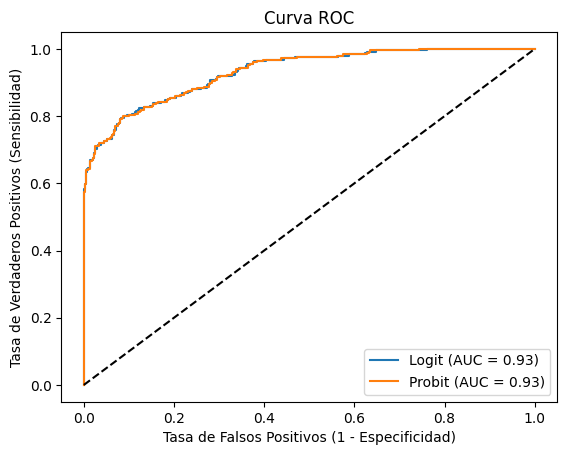

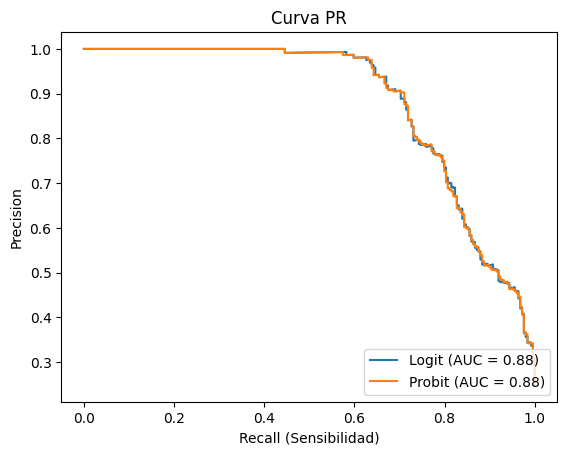

In [118]:
# Obtener las probabilidades de predicción para ambos modelos
predicciones_logit = logit_model.predict(X)
predicciones_probit = probit_model.predict(X)

# Calcular la curva ROC para ambos modelos
fpr_logit, tpr_logit, umbral_roc_logit = roc_curve(Y, predicciones_logit)
fpr_probit, tpr_probit, umbral_roc_probit = roc_curve(Y, predicciones_probit)

# Calcular el área bajo la curva ROC para ambos modelos
roc_auc_logit = roc_auc_score(Y, predicciones_logit)
roc_auc_probit = roc_auc_score(Y, predicciones_probit)

# Calcular la curva PR para ambos modelos
precision_logit, recall_logit, umbral_pr_logit = precision_recall_curve(Y, predicciones_logit)
precision_probit, recall_probit, umbral_pr_probit = precision_recall_curve(Y, predicciones_probit)

# Calcular el área bajo la curva PR para ambos modelos
pr_auc_logit = auc(recall_logit, precision_logit)
pr_auc_probit = auc(recall_probit, precision_probit)

# Graficar la curva ROC para ambos modelos
plt.plot(fpr_logit, tpr_logit, label='Logit (AUC = %0.2f)' % roc_auc_logit)
plt.plot(fpr_probit, tpr_probit, label='Probit (AUC = %0.2f)' % roc_auc_probit)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Graficar la curva PR para ambos modelos
plt.plot(recall_logit, precision_logit, label='Logit (AUC = %0.2f)' % pr_auc_logit)
plt.plot(recall_probit, precision_probit, label='Probit (AUC = %0.2f)' % pr_auc_probit)
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precision')
plt.title('Curva PR')
plt.legend(loc="lower right")
plt.show()

**Sensibilidad y Especifidad**

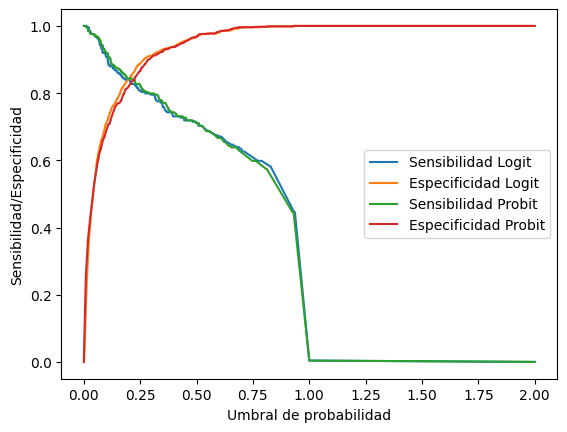

In [119]:
# Calcular la tasa de verdaderos positivos (sensibilidad), la tasa de falsos positivos y los umbrales de probabilidad para cada modelo
logit_fpr, logit_tpr, logit_thresholds = roc_curve(Y, logit_model.predict(X))
probit_fpr, probit_tpr, probit_thresholds = roc_curve(Y, probit_model.predict(X))

# Calcular la sensibilidad y especificidad en función del umbral de probabilidad
logit_sensitivity = logit_tpr
logit_specificity = 1 - logit_fpr

probit_sensitivity = probit_tpr
probit_specificity = 1 - probit_fpr

# Graficar la sensibilidad y especificidad en función del umbral de probabilidad para cada modelo
plt.plot(logit_thresholds, logit_sensitivity, label='Sensibilidad Logit')
plt.plot(logit_thresholds, logit_specificity, label='Especificidad Logit')
plt.plot(probit_thresholds, probit_sensitivity, label='Sensibilidad Probit')
plt.plot(probit_thresholds, probit_specificity, label='Especificidad Probit')
plt.xlabel('Umbral de probabilidad')
plt.ylabel('Sensibilidad/Especificidad')
plt.legend()
plt.show()

# Scoring

Se crea un split de la base de datos para entrenamiento y prueba del modelo y con las estimaciones obtenidas y los datos reales de incumplimiento se determinan los umbrales de riesgo.

## RLM

In [120]:
# Se crea base para testing y training (80-20)
# Dividimos cumplidos e incumplidos en misma proporción
X_train_RLM, X_test_RLM, Y_train_RLM, Y_test_RLM = train_test_split(X, Y,
                                                    test_size=0.2, random_state = 42,
                                                    stratify=Y)
# Inner Join con probabilidades estimadas por el modelo RLM
Summary_RLM = pd.merge(Y_train_RLM, RLM_P['Probabilidad Estimada'], left_index=True,right_index=True)
# Se ordena el df de forma ascendente dada las probabilidades estimadas
Summary_RLM = Summary_RLM.sort_values(by='Probabilidad Estimada')

# Calcula el total de ceros en la columna 'Incumplimiento'
total_unos = Summary_RLM['Incumplimiento'].sum()
total_zeros = len(Summary_RLM['Incumplimiento']) - total_unos

# Inicializar una lista para almacenar la frecuencia incremental de ceros y unos
frecuencia_zeros = []
frecuencia_unos= []

#Ciclo for que crea frecuencias incrementales por tipo de cumplimiento
for index, row in Summary_RLM.iterrows():
  if row['Incumplimiento'] == 0:
    zeros = sum(Summary_RLM.loc[:index, 'Incumplimiento'] == 0)
    frecuencia_zeros.append(zeros/total_zeros)
    frecuencia_unos.append(0) if not frecuencia_unos else frecuencia_unos.append(frecuencia_unos[-1])
  else:
    unos = sum(Summary_RLM.loc[:index, 'Incumplimiento'] == 1)
    frecuencia_unos.append(unos/total_unos)
    frecuencia_zeros.append(0) if not frecuencia_zeros else frecuencia_zeros.append(frecuencia_zeros[-1])

#Anexamos columnas con frecuencias incrementales
Summary_RLM['% Cumplidos'] =  frecuencia_zeros
Summary_RLM['% Incumplidos'] =  frecuencia_unos

#Reiniciamos indices
Summary_RLM = Summary_RLM.reset_index(drop = True)
Summary_RLM.index = Summary_RLM.index + 1

#Registramos los niveles crediticios
Niveles_Crediticios = pd.Series(['AAA','AA+','AA', 'AA-', 'A+', 'A', 'A-',
                                 'BBB+', 'BBB', 'BBB-', 'BB+', 'BB', 'BB-', 'B+',
                                 'B', 'B-', 'CCC+', 'CCC', 'CCC-', 'CC', 'C', 'D'], name = "Niveles")
#Se registran intervalos
Num_Int = math.ceil(len(Summary_RLM) / len(Niveles_Crediticios))
Intervalos_RLM = pd.Series(list(range(Num_Int, len(Summary_RLM), Num_Int)) + [len(Summary_RLM)], name = "Intervalos").to_frame()

#Inner Join de las tablas
Intervalos_RLM['Niveles'] = Niveles_Crediticios
Intervalos_RLM = Intervalos_RLM.merge(Summary_RLM.iloc[:,1:4], left_on='Intervalos',right_index = True)
#Expresamos en porcentaje
Intervalos_RLM = Intervalos_RLM.apply(lambda x: round(x*100,2) if x.name in Intervalos_RLM.iloc[:,2:5] else x)
Intervalos_RLM

,Intervalos,Niveles,Probabilidad Estimada,% Cumplidos,% Incumplidos
0,37,AAA,-9.83,6.16,0.00
1,74,AA+,-6.04,12.31,0.00
2,111,AA,-3.08,18.47,0.00
3,148,AA-,-0.24,24.63,0.00
4,185,A+,2.27,30.45,1.01
5,222,A,4.75,36.44,1.51
6,259,A-,7.23,42.43,2.01
7,296,BBB+,9.75,48.42,2.51
8,333,BBB,11.88,54.58,2.51
9,370,BBB-,14.02,60.07,4.52


In [207]:
#Guardamos umbral
Umbral_RLM = Intervalos_RLM.iloc[15,2:5]
Umbral_RLM

Probabilidad Estimada    34.85
% Cumplidos              91.85
% Incumplidos             20.1
Name: 15, dtype: object

 Se determinan los umbrales de riesgo y tomamos el conservador (**B-**) como el que se apega a nuestros intereses. Esto quiere decir que, con una probabilidad del 34.85%, estaremos aceptando, a lo menos, al 91.85% de los cumplidos y, a su vez, al 20.10% de los incumplidos.

## Logit

In [121]:
# Se crea otra base para testing y training (80-20)
# Dividimos cumplidos e incumplidos en misma proporción
X_train_Logit, X_test_Logit, Y_train_Logit, Y_test_Logit = train_test_split(X, Y,
                                                    test_size=0.2, random_state = 43,
                                                    stratify=Y)

# Inner Join con probabilidades estimadas por el modelo Logit
Summary_Logit = pd.merge(Y_train_Logit, logit_P['Probabilidad Estimada'], left_index=True,right_index=True)
# Se ordena el df de forma ascendente dada las probabilidades estimadas
Summary_Logit = Summary_Logit.sort_values(by='Probabilidad Estimada')

# Calcula el total de ceros en la columna 'Incumplimiento'
total_unos = Summary_Logit['Incumplimiento'].sum()
total_zeros = len(Summary_Logit['Incumplimiento']) - total_unos

# Inicializar una lista para almacenar la frecuencia incremental de ceros y unos
frecuencia_zeros = []
frecuencia_unos= []

#Ciclo for que crea frecuencias incrementales por tipo de cumplimiento
for index, row in Summary_Logit.iterrows():
  if row['Incumplimiento'] == 0:
    zeros = sum(Summary_Logit.loc[:index, 'Incumplimiento'] == 0)
    frecuencia_zeros.append(zeros/total_zeros)
    frecuencia_unos.append(0) if not frecuencia_unos else frecuencia_unos.append(frecuencia_unos[-1])
  else:
    unos = sum(Summary_Logit.loc[:index, 'Incumplimiento'] == 1)
    frecuencia_unos.append(unos/total_unos)
    frecuencia_zeros.append(0) if not frecuencia_zeros else frecuencia_zeros.append(frecuencia_zeros[-1])

#Anexamos columnas con frecuencias incrementales
Summary_Logit['% Cumplidos'] =  frecuencia_zeros
Summary_Logit['% Incumplidos'] =  frecuencia_unos

#Reiniciamos indices
Summary_Logit = Summary_Logit.reset_index(drop = True)
Summary_Logit.index = Summary_Logit.index + 1

#Se registran intervalos
Num_Int = math.ceil(len(Summary_Logit) / len(Niveles_Crediticios))
Intervalos_Logit = pd.Series(list(range(Num_Int, len(Summary_Logit), Num_Int)) + [len(Summary_Logit)], name = "Intervalos").to_frame()

#Inner Join de las tablas
Intervalos_Logit['Niveles'] = Niveles_Crediticios
Intervalos_Logit = Intervalos_Logit.merge(Summary_Logit.iloc[:,1:4], left_on='Intervalos',right_index = True)
#Expresamos en porcentaje
Intervalos_Logit = Intervalos_Logit.apply(lambda x: round(x*100,2) if x.name in Intervalos_Logit.iloc[:,2:5] else x)
Intervalos_Logit

,Intervalos,Niveles,Probabilidad Estimada,% Cumplidos,% Incumplidos
0,37,AAA,0.55,6.16,0.00
1,74,AA+,0.76,12.31,0.00
2,111,AA,1.12,18.47,0.00
3,148,AA-,1.42,24.63,0.00
4,185,A+,1.81,30.78,0.00
5,222,A,2.34,36.77,0.50
6,259,A-,3.14,42.76,1.01
7,296,BBB+,3.81,48.75,1.51
8,333,BBB,5.03,54.74,2.01
9,370,BBB-,6.08,60.57,3.02


In [173]:
#Guardamos umbral
Umbral_logit = Intervalos_Logit.iloc[15,2:5]
Umbral_logit

Probabilidad Estimada    31.13
% Cumplidos              91.85
% Incumplidos             20.1
Name: 15, dtype: object

 Se determina los umbrales de riesgo y tomamos el conservador (**B-**)  como el que se apega a nuestros intereses. Esto quiere decir que, con una probabilidad del 31.13%, estaremos aceptando, a lo menos, al 91.85% de los cumplidos y, a su vez, al 20.10% de los incumplidos.

## Probit

In [127]:
# Se crea otra base para testing y training (80-20)
# Dividimos cumplidos e incumplidos en misma proporción
X_train_Probit, X_test_Probit, Y_train_Probit, Y_test_Probit = train_test_split(X, Y,
                                                    test_size=0.2, random_state = 44,
                                                    stratify=Y)

# Inner Join con probabilidades estimadas por el modelo Logit
Summary_Probit = pd.merge(Y_train_Probit, probit_P['Probabilidad Estimada'], left_index=True,right_index=True)
# Se ordena el df de forma ascendente dada las probabilidades estimadas
Summary_Probit = Summary_Probit.sort_values(by='Probabilidad Estimada')

# Calcula el total de ceros en la columna 'Incumplimiento'
total_unos = Summary_Probit['Incumplimiento'].sum()
total_zeros = len(Summary_Probit['Incumplimiento']) - total_unos

# Inicializar una lista para almacenar la frecuencia incremental de ceros y unos
frecuencia_zeros = []
frecuencia_unos= []

#Ciclo for que crea frecuencias incrementales por tipo de cumplimiento
for index, row in Summary_Probit.iterrows():
  if row['Incumplimiento'] == 0:
    zeros = sum(Summary_Probit.loc[:index, 'Incumplimiento'] == 0)
    frecuencia_zeros.append(zeros/total_zeros)
    frecuencia_unos.append(0) if not frecuencia_unos else frecuencia_unos.append(frecuencia_unos[-1])
  else:
    unos = sum(Summary_Probit.loc[:index, 'Incumplimiento'] == 1)
    frecuencia_unos.append(unos/total_unos)
    frecuencia_zeros.append(0) if not frecuencia_zeros else frecuencia_zeros.append(frecuencia_zeros[-1])

#Anexamos columnas con frecuencias incrementales
Summary_Probit['% Cumplidos'] =  frecuencia_zeros
Summary_Probit['% Incumplidos'] =  frecuencia_unos

#Reiniciamos indices
Summary_Probit = Summary_Probit.reset_index(drop = True)
Summary_Probit.index = Summary_Probit.index + 1

#Se registran intervalos
Num_Int = math.ceil(len(Summary_Probit) / len(Niveles_Crediticios))
Intervalos_Probit = pd.Series(list(range(Num_Int, len(Summary_Probit), Num_Int)) + [len(Summary_Probit)], name = "Intervalos").to_frame()

#Inner Join de las tablas
Intervalos_Probit['Niveles'] = Niveles_Crediticios
Intervalos_Probit = Intervalos_Probit.merge(Summary_Probit.iloc[:,1:4], left_on='Intervalos',right_index = True)
#Expresamos en porcentaje
Intervalos_Probit = Intervalos_Probit.apply(lambda x: round(x*100,2) if x.name in Intervalos_Probit.iloc[:,2:5] else x)
Intervalos_Probit


,Intervalos,Niveles,Probabilidad Estimada,% Cumplidos,% Incumplidos
0,37,AAA,0.19,6.16,0.00
1,74,AA+,0.34,12.31,0.00
2,111,AA,0.62,18.47,0.00
3,148,AA-,0.88,24.63,0.00
4,185,A+,1.20,30.62,0.50
5,222,A,1.86,36.77,0.50
6,259,A-,2.63,42.43,2.01
7,296,BBB+,3.60,48.25,3.02
8,333,BBB,4.91,54.24,3.52
9,370,BBB-,6.23,60.23,4.02


In [172]:
#Guardamos umbral
Umbral_probit = Intervalos_Probit.iloc[15,2:5]
Umbral_probit

Probabilidad Estimada    32.71
% Cumplidos              91.51
% Incumplidos            21.11
Name: 15, dtype: object

 Se determinan los umbrales de riesgo y tomamos el conservador (**B-**) como el que se apega a nuestros intereses. Esto quiere decir que, con una probabilidad del 32.71%, estaremos aceptando, a lo menos, al 91.51:% de los cumplidos y, a su vez, al 21.11% de los incumplidos.

# Prueba

 Se toma la base de prueba (el 20% que restan de ambas partes separadas de la base original). Luego, se determina si se acepta o no se acepta a la persona dependiendo el umbral de riesgo que hayamos definido. Finalmente, se compara los porcentajes de aceptados y rechazados dado el umbral elegido con respecto a los datos reales obtenidos. Lo ideal sería tener los mismos porcentajes de Cumplidos e Incumplidos dados por el umbral elegido

## RLM

In [291]:
#Inner Join entre los incumplimientos a testear con las probabilidades estimadas por el modelo RLM
Test_RLM = pd.merge(Y_test_RLM, RLM_P['Probabilidad Estimada'], left_index=True,right_index=True)
#Ordenamos por Incumplimiento (Primero los 0's luego los 1's)
Test_RLM = Test_RLM.sort_values(by='Incumplimiento')
#Si la probabilidad estimada es menor al umbral se toma como Aceptado (Cumple)
Test_RLM['Aceptación con RLM'] = Test_RLM['Probabilidad Estimada'].apply(lambda x: "Aceptado"  if x <= Umbral_RLM[0]/100 else "Rechazado")

#Se obtienen porcentajes de aceptados y rechazados por el modelo dado que las personas realmente cumplieron (Incumplimiento = 0)
counts = Test_RLM.groupby(['Incumplimiento', 'Aceptación con RLM']).size()
Aceptados_RLM = np.array([counts.get(0)[0], counts.get(1)[0]]) / Test_RLM.groupby(['Incumplimiento']).size().to_numpy() * 100
#Se obtienen porcentajes de aceptación con respecto al umbral
Umbral_RLM_perc = Umbral_RLM[1:3].to_numpy()
#Se crea tabla de resultados
RLM_table = pd.DataFrame([Umbral_RLM_perc, Aceptados_RLM], columns=['Cumplidos', 'Incumplidos'], index = ['Referencia','Test'])
RLM_table = RLM_table.applymap(lambda x: '{:.2%}'.format(x/100))
RLM_table

,Cumplidos,Incumplidos
Referencia,91.85%,20.10%
Test,95.33%,34.00%


Notamos que efectivamente el modelo funciona, al igual que nuestros umbrales, pues con una probabilidad 34.85%, estamos aceptando al menos al 95.33% de los cumplidos y al 34% de los incumplidos, lo cual es mayor a lo establecido, en el caso de los cumplidos. Sin embargo, no es bueno que sea mayor en el caso de los incumplidos.

## Logit

In [292]:
#Inner Join entre los incumplimientos a testear con las probabilidades estimadas por el modelo Logit
Test_Logit = pd.merge(Y_test_Logit, logit_P['Probabilidad Estimada'], left_index=True,right_index=True)
#Ordenamos por Incumplimiento (Primero los 0's luego los 1's)
Test_Logit = Test_Logit.sort_values(by='Incumplimiento')
#Si la probabilidad estimada es menor al umbral se toma como Aceptado (Cumple)
Test_Logit['Aceptación con Logit'] = Test_Logit['Probabilidad Estimada'].apply(lambda x: "Aceptado"  if x <= Umbral_logit[0]/100 else "Rechazado")

#Se obtienen porcentajes de aceptados y rechazados por el modelo dado que las personas realmente cumplieron (Incumplimiento = 0)
counts = Test_Logit.groupby(['Incumplimiento', 'Aceptación con Logit']).size()
Aceptados_Logit = np.array([counts.get(0)[0], counts.get(1)[0]]) / Test_Logit.groupby(['Incumplimiento']).size().to_numpy() * 100
#Se obtienen porcentajes de aceptación con respecto al umbral
Umbral_Logit_perc = Umbral_logit[1:3].to_numpy()
#Se crea tabla de resultados
Logit_table = pd.DataFrame([Umbral_Logit_perc, Aceptados_Logit], columns=['Cumplidos', 'Incumplidos'], index = ['Referencia','Test'])
Logit_table = Logit_table.applymap(lambda x: '{:.2%}'.format(x/100))
Logit_table

,Cumplidos,Incumplidos
Referencia,91.85%,20.10%
Test,90.67%,22.00%


Notamos que el modelo funciona regularmente, al igual que nuestros umbrales, pues con una probabilidad 31.13%, estamos aceptando al menos al 90.67% de los cumplidos y al 22% de los incumplidos, lo cual es menos a lo establecido en el caso de los cumplidos, y mayor en el caso de los incumplidos.

## Probit

In [297]:
#Inner Join entre los incumplimientos a testear con las probabilidades estimadas por el modelo Probit
Test_Probit = pd.merge(Y_test_Probit, probit_P['Probabilidad Estimada'], left_index=True,right_index=True)
#Ordenamos por Incumplimiento (Primero los 0's luego los 1's)
Test_Probit = Test_Probit.sort_values(by='Incumplimiento')
#Si la probabilidad estimada es menor al umbral se toma como Aceptado (Cumple)
Test_Probit['Aceptación con Probit'] = Test_Probit['Probabilidad Estimada'].apply(lambda x: "Aceptado"  if x <= Umbral_probit[0]/100 else "Rechazado")

#Se obtienen porcentajes de aceptados y rechazados por el modelo dado que las personas realmente cumplieron (Incumplimiento = 0)
counts = Test_Probit.groupby(['Incumplimiento', 'Aceptación con Probit']).size()
Aceptados_Probit = np.array([counts.get(0)[0], counts.get(1)[0]]) / Test_Probit.groupby(['Incumplimiento']).size().to_numpy() * 100
#Se obtienen porcentajes de aceptación con respecto al umbral
Umbral_Probit_perc = Umbral_probit[1:3].to_numpy()
#Se crea tabla de resultados
Probit_table = pd.DataFrame([Umbral_Probit_perc, Aceptados_Probit], columns=['Cumplidos', 'Incumplidos'], index = ['Referencia','Test'])
Probit_table = Probit_table.applymap(lambda x: '{:.2%}'.format(x/100))
Probit_table

,Cumplidos,Incumplidos
Referencia,91.51%,21.11%
Test,92.00%,20.00%


Notamos que efectivamente el modelo funciona al igual que nuestros umbrales, pues con una probabilidad 32.71%, estamos aceptando al menos al 92% de los cumplidos y al 20% de los incumplidos, lo cual es mayor a lo establecido en el caso de los cumplidos, y menos en el caso de los incumplidos.